# What Makes a Good Video Game
#### Anthony Louie

## Introduction

Video games are one of the most popular past times today. The first form of video games weren't even for entertainment purposes, they were for military. Over time, with the advances in technology and the growing popularity around gaming, video games started to become more creative and complex. one of the most notable events were the coin based arcade machines. These were those huge single game machines in stores and restaurants that used quaters per play. Soon, the gaming industry was brought to people's homes with consoles. These early forms of consoles laid the foundation for companies like Sony, Nintendo, Microsoft to build what are some of the most popular consoles in the world. But gaming is not just limited to consoles. PC Gaming is some thing that also became popular, starting from built in games like chess to web games like Club Penguin. PC gaming today is arguably the most famous forms of gaming since have a PC means you can do other work besides gaming. With all of these platforms and games, it begs the question: What makes a good video game?

For this tutorial, I am going to try and gain some insight to how we can try and answer this question using data science. To do so, we are going to have to find some data of video games. Then try to find some trends and analyze patterns in the data using visualizations. Then construct some kind of machine learning model to see if we can predict if a game will be good.

## Data Collection

The first step in the data science pipeline is to collect data. For my needs I want to find a dataset of some of the best modern titles. I found a dataset from [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales), which got infomation from [vgchartz](https://www.vgchartz.com/), of games that sold more than 100000 copies and contains some statistics on sales of those games. They have it nicely formated for use in the form of a csv file, directly available on their site. If you want, they also provided [code](https://github.com/GregorUT/vgchartzScrape/blob/master/vgchartzfull.py) that scrapes the data directly from vgchartz. This is a useful skill to have for data science because not all data will be nicely formated and given to you. And so it is worth checking out. Also, this dataset is a bit old, so some of the numbers may not be up to date, especially the closer you get to modern day. And because of the age, mobile games are not included in this dataset.

Another dataset I found was from [here](https://corgis-edu.github.io/corgis/csv/video_games/) and it was originally collected by Dr. Joe Cox for analysis similar to what we are doing. This dataset contains information besides sales like time splent playing the game, if the games are a part a series, ratings, etc. It provides more 

In [1]:
import numpy as np
import pandas as pd

# load the csv file locally
vgsales = pd.read_csv('vgsales.csv')
vgdata = pd.read_csv('video_games.csv')

In [2]:
# here's the top 10 of video game sales
vgsales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


A quick note on the data, all sales numbers are in millions.

In [3]:
# here's the first ten of game details
vgdata.head(10)

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
5,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,...,20.833333,25.200000,20.000000,3,16.450000,15.500000,15.750000,15.500000,2,15.250000
6,Ridge Racer,True,1,True,True,Racing / Driving,True,Namco,True,88,...,0.883333,0.933333,0.883333,2,0.833333,0.616667,0.783333,0.533333,3,0.450000
7,Metal Gear Ac!d,True,1,True,True,Strategy,True,Konami,True,75,...,24.833333,27.483333,25.100000,6,21.916667,20.700000,23.600000,20.783333,11,17.883333
8,Madden NFL 2005,True,1,True,True,Sports,True,EA,True,68,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
9,Pokmon Dash,True,1,True,True,Racing / Driving,True,Nintendo,True,46,...,0.000000,0.000000,0.000000,0,0.000000,1.116667,1.200000,1.083333,3,1.050000


## Data Processing

Now that we have the data, we should clean it up. First, is to address any missing data. Sales numbers for some games are missing in the sense that there was no reporting of sales numbers in that country. This was because of the game not being officially released in said country or countries. Which makes this kind of missing data, missing not at random. Because there are no official sales numbers, I am going to fill in those spots with zero because the amount of sales are officially zero.

In [4]:
# replace missing sales values with zeros
vgsales['NA_Sales'] = vgsales['NA_Sales'].fillna(0)
vgsales['EU_Sales'] = vgsales['EU_Sales'].fillna(0)
vgsales['JP_Sales'] = vgsales['JP_Sales'].fillna(0)
vgsales['Other_Sales'] = vgsales['Other_Sales'].fillna(0)
vgsales['Global_Sales'] = vgsales['Global_Sales'].fillna(0)

Next would be to convert some of the numeric columns to be integers or floats since numbers are better analysis. Pandas has a useful function [to_numeric](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) that changes strings to integers or floats.

In [5]:
# convert numerical columns to be numbers
vgsales['Rank'] = pd.to_numeric(vgsales['Rank'])
vgsales['Year'] = pd.to_numeric(vgsales['Year'])
vgsales['NA_Sales'] = pd.to_numeric(vgsales['NA_Sales'])
vgsales['EU_Sales'] = pd.to_numeric(vgsales['EU_Sales'])
vgsales['JP_Sales'] = pd.to_numeric(vgsales['JP_Sales'])
vgsales['Other_Sales'] = pd.to_numeric(vgsales['Other_Sales'])
vgsales['Global_Sales'] = pd.to_numeric(vgsales['Global_Sales'])

Some video game titles have missing release date years. A quick google search of the name of the game will show you the official release date. I updated my own copy of the dataset to reflect that, but if you were to download the data yourself, then you would have to update that yourself.

The second dataset I am using does not contain any missing data, so there is no need to modify it.

## Exploratory Analysis and Data Visualization

Now that we have the data in a usable form, we can now use it in creating visualizations to see trends and patterns within the data. These will help provide insights on things that we might want to take a closer look at for maybe some further analysis. We'll utilize some data visualization libraries for this.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

One initial metric we want to look at is the number of sales for games released during a particular time. Maybe a region has something to do with sales. In order to do this, we need to group games by their release date.

In [7]:
# group by year
data_by_year = vgsales.groupby(['Year']).sum()
# get the years for plot
print(data_by_year.index)

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0],
             dtype='float64', name='Year')


An important note is that the number of sales is the total since the time period, so you can think of the plot as the total sales for a game made in that time period.

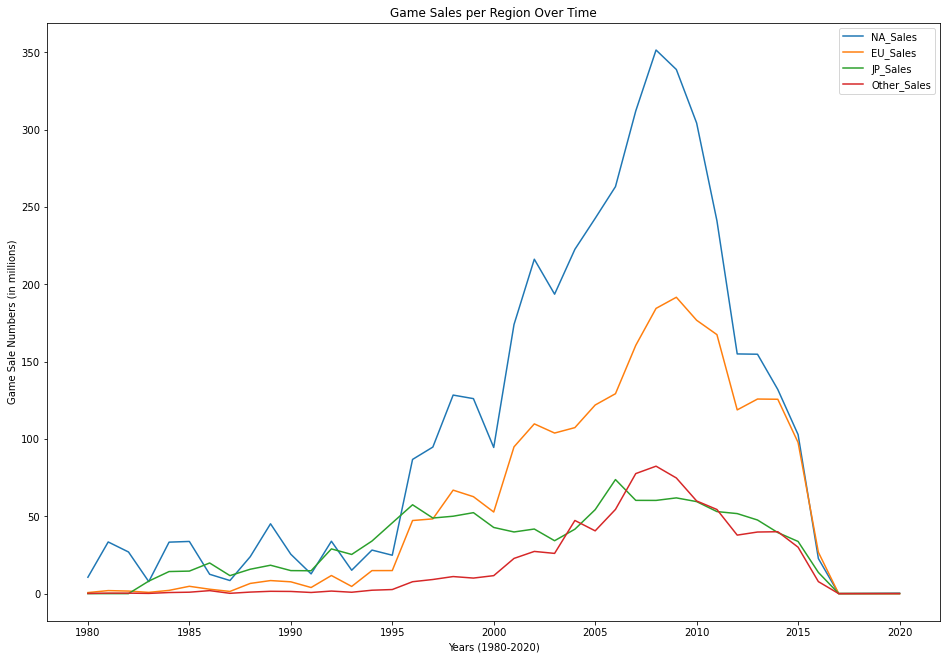

In [8]:
plt.figure(figsize=(16, 11))
plt.title('Game Sales per Region Over Time')
plt.xlabel('Years (1980-2020)')
plt.ylabel('Game Sale Numbers (in millions)')

plt.plot(data_by_year.index, data_by_year['NA_Sales'], label='NA_Sales') # North America
plt.plot(data_by_year.index, data_by_year['EU_Sales'], label='EU_Sales') # Europe
plt.plot(data_by_year.index, data_by_year['JP_Sales'], label='JP_Sales') # Japan
plt.plot(data_by_year.index, data_by_year['Other_Sales'], label='Other_Sales')

plt.legend()
plt.show()

So looking at this plot, we can see North America has more game sales than the other regions by a large margin starting in 1995. At its peak of total sales (around 2008), North America seems to be almost double of that of the Europe. This means that video game sales are much higher in North America. Interestingly, it seems that there is a common trend over time. When one region has an increase of game sales, another seems to as well. This is explained by the popularity of video games released in the corresponding year. When a game is popular, it tends to be popular throughout the world.

To see that, let's look at the top five games in global sales to see how they sales are distributed throughout regions. I'm going to use pie charts so you can see the proportions easier. And you can get a sense of the percentages for each compared to the global/total sales.

In [9]:
top_ten = vgsales[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales']].head(5)

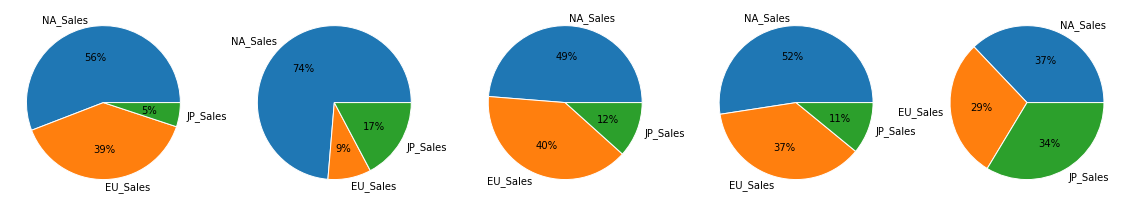

In [15]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
for i in range(5):
    wedges = list(top_ten.iloc[i][1:4])
    labels = list(top_ten.columns[1:4])
    ax[i].pie(x = wedges, labels=labels, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, autopct = '%0.0f%%')
    c = c + 1
    
plt.show()

You can see that NA has the highest ratio when compared to the other two and EU usually has the second most. And you can see that EU sales and JP sales are not negligible, they hold a decent proportion. Now, we only looked at the top five games in global sales, but they have the most sales therefore they hold the most weight in terms of raw numbers.

### What about Game Publishers?

An interesting metric would be which publishers make the top of the sales. We typically know the big names like Nintendo, Sega, Blizzard, EA, etc. but how do they perform when looking at each other. Since we have 579 different publishers, it would be too much to look at all of them at once, so we'll take a look at the top 2%, which is about 12 publishers.

In [17]:
# there are this many unique game publishers in this dataset
print('There are ', len(vgsales['Publisher'].unique()), ' publishers.', sep='')

There are 579 publishers.


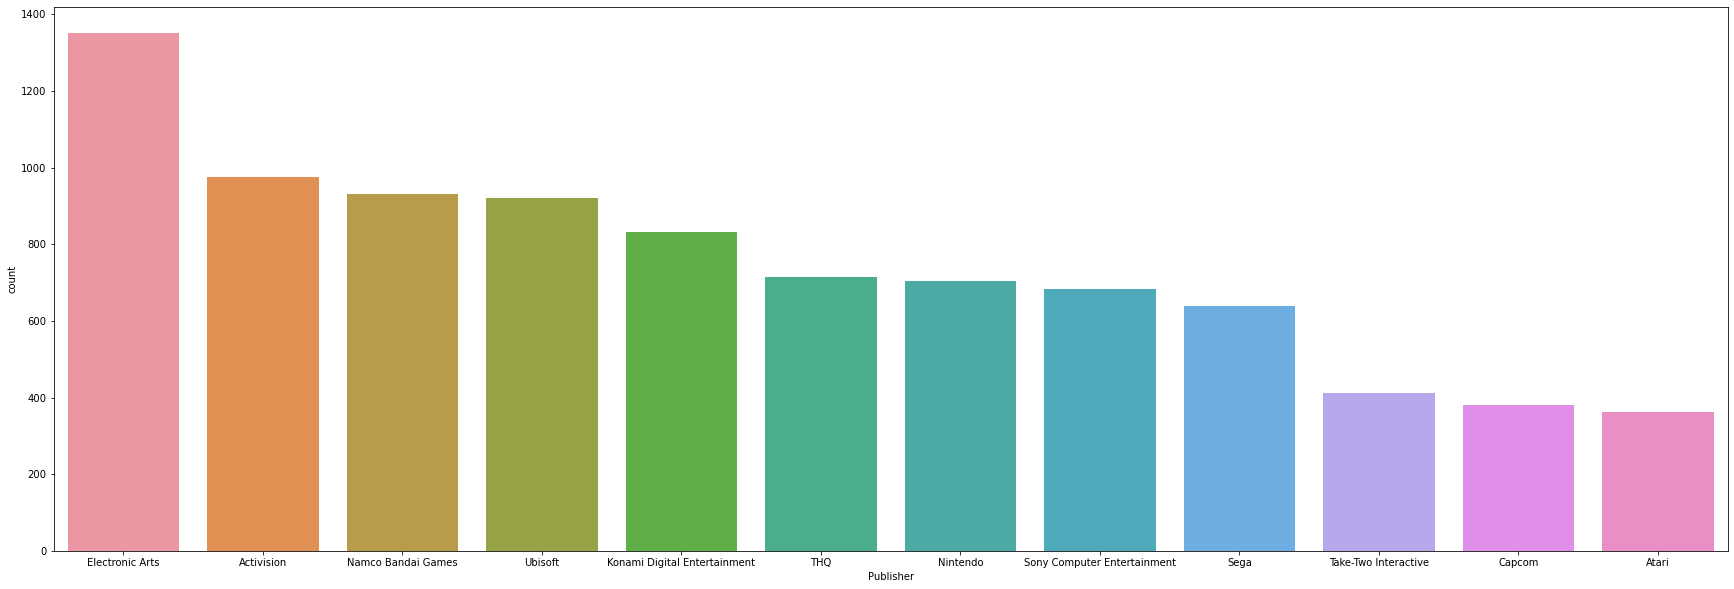

In [27]:
plt.figure(figsize=(30,10))
# it would be impossible to show all 579, so we will look at the first 12
publishers_12 = list(pd.value_counts(vgsales['Publisher']).iloc[:12].index)
sns.countplot(x='Publisher', data=vgsales, order=publishers_12)
plt.show()

It seems that after the 9th publisher, Sega, there starts to be a significant dip in number of titles that make the list. The visual representation might be not a good exmaple based on the scale used, but the actual different is about 200 games. If you compare that to the number of total games of Take-Two Interactive, the 10th highest publisher, 200 games is over one third of their games. Which is a significant percentage when looked at the publisher individually.

But just looking at the number of titles doesn't take into account the amount of sales that those publishers made. It would be unfair to categorize a game that sold 1000000 copies to one that sold 100000 copies. Let's take a look of the number of total game sales for these 12 publishers. Then let's check the average sales for each game from each publisher.

In [62]:
# make a deep copy of original data
publisher_globalsales_12 = vgsales.copy(deep=True)

publisher_globalsales_12 = publisher_globalsales_12[publisher_globalsales_12['Publisher'].isin(publishers_12)]

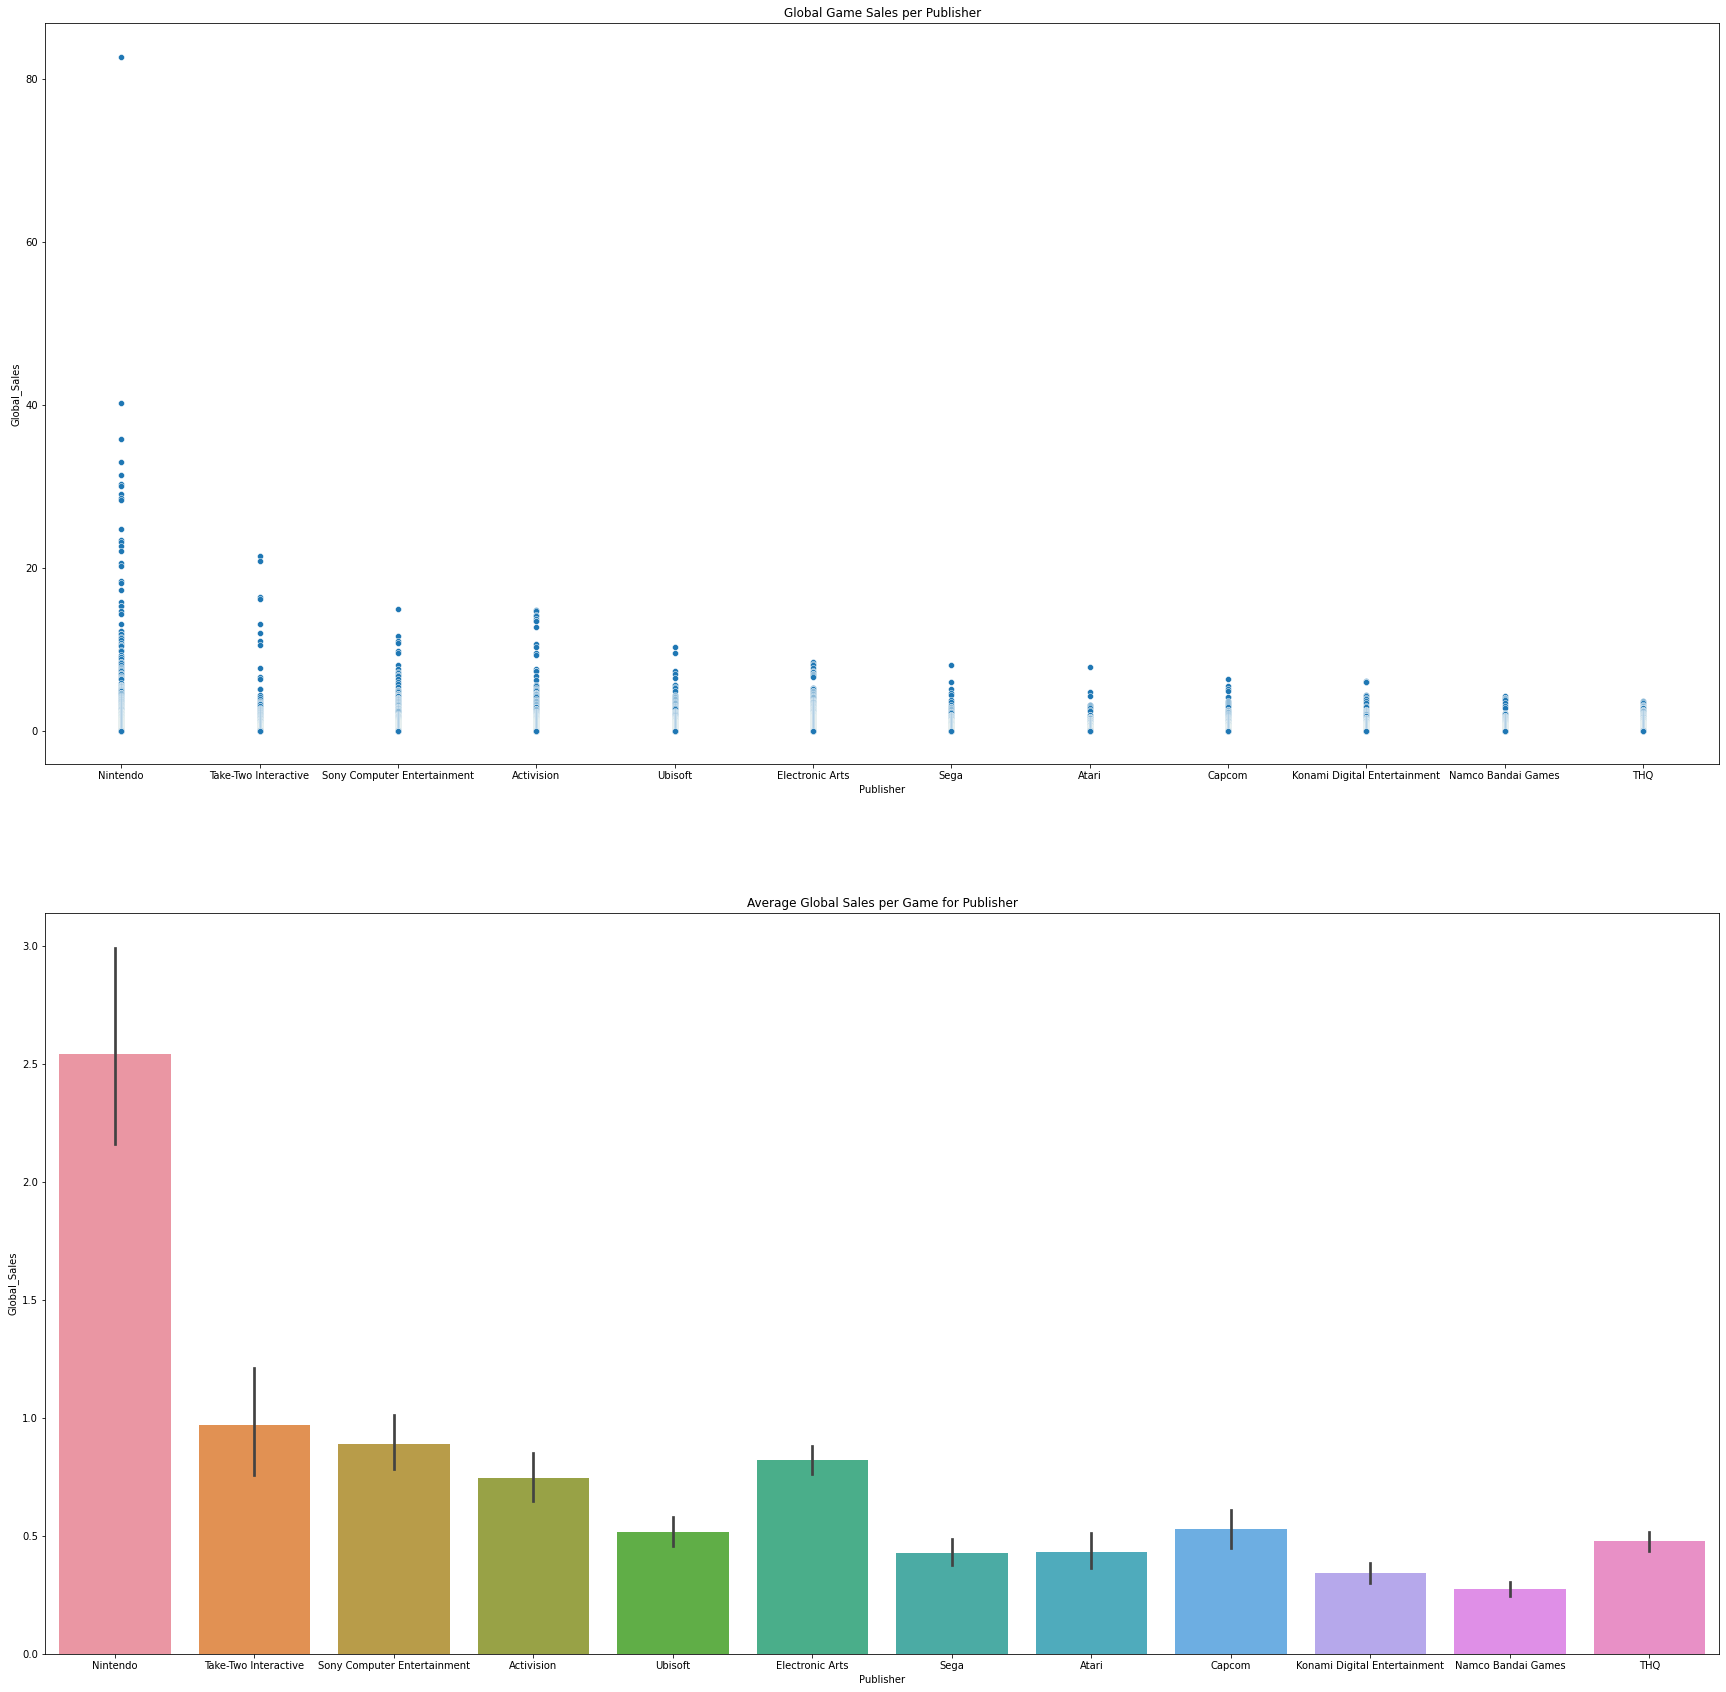

In [73]:
fig, ax = plt.subplots(2,1, figsize=(30,30))
# it would be impossible to show all 579, so we will look at the first 12
sns.scatterplot(x='Publisher', y='Global_Sales', data=publisher_globalsales_12, ax=ax[0])
ax[0].set_title('Global Game Sales per Publisher')
# these show the average number of global game sales for each company
sns.barplot(x='Publisher', y='Global_Sales', data=publisher_globalsales_12, ax=ax[1])
ax[1].set_title('Average Global Sales per Game for Publisher')
plt.show()

Looking at the scatterplot, it will be hard to see, but just looking at the ends of each will show you the mins and maxes that each publisher gets. You can see that all publishers have games that do relatively poorly, shown by the min, but the point of interest is the max of each. The max shows the games that had the most global sales for the publishers. And you can see that the further right of the publishers, they have games that don't nearly sell as well as some of those by the further left publishers. However, this could just be a trick because of a few games that sell really well, outlies can skew the data easily. Which is why consistency is another metric of importantance. To see that let's look at the barplot. This barplot shows the average global sales for a game by the company and here we can see what the average game will be like. We see here that Electronic Arts, Capcom, and THQ have averages that are higher than the ones near it, but since they are further right on the list, it means they have games that don't have as high total global sales. But this metric shows how well a game sells on average, so you can expect a game from that company to sell that many. This is the idea of quality vs quantity. The quality of a game typically dictates the number of sales, but the quantity of games allows for additional sales. Some publishers release more games than others and that could be a reason why that publisher makes more sales, but some smaller publishers could be selling a game that competes with larger publishers in raw sales, but because of limitatons due to their smaller workforce, budget, etc., they can't release the same number of games to compete with overall. This is why looking at metrics besides the total number of sales is important.

### Does the Game's Genre Matter?

Just like with publishers, we can take a look at how a game's genre is related to game sales. There could a more general genre that sells more than a niche one. This could also show companies which game to develop because the population likes some more than others, and if they design a game that has a popular genre, then they are more likely to rack up sales.

In [81]:
# different genres in vgsales
print(list(vgsales['Genre'].unique()))

['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']
